In [1]:
# Problem Statement
#The goal of the project is to detect whether a transaction is a normal payment or a fraud.

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix


In [2]:
# Load csv files with pandas
fraud_data = read_csv('C:\\Users\\Dayanand\\Desktop\\SamatrixDataScience\\Machine Learning Projects\\Project 1(Finance)\\DataSets\\creditcard.csv.zip')


In [3]:
#View the raw data
set_option('display.width', 100)
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#The dimension of the data
fraud_data.shape


(284807, 31)

In [10]:
#The Data Types of the attributes
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#Count of Null Values
fraud_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Exploratory Data Analysis

In [12]:
#Statistical Analysis of data
set_option('precision', 2)
fraud_data.describe()
#fraud_data.describe().T -T-Transpose

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,...,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,3.92e-15,5.68e-16,-8.76e-15,2.81e-15,-1.55e-15,2.04e-15,-1.70e-15,-1.89e-16,-3.15e-15,...,1.47e-16,8.04e-16,5.28e-16,4.46e-15,1.43e-15,1.70e-15,-3.66e-16,-1.22e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,...,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,...,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,...,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,...,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,...,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,...,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


In [11]:
#Response Variable Analysis
#Fraud vs Non-Fraud
class_names = {0:'Not Fraud', 1:'Fraud'}
print(fraud_data.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [14]:
fraud_data.Class.value_counts()[0:1]
fraud_data.groupby("Class")["Class"].count()

Class
0    284315
1       492
Name: Class, dtype: int64

In [11]:
# Split the datasets into train & test
from sklearn.model_selection import train_test_split
y= fraud_data["Class"]
X = fraud_data.loc[:, fraud_data.columns != 'Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(94936,)

In [12]:
#Import Library for Accuracy Score
from sklearn.metrics import accuracy_score


In [14]:
# Logistic Regression

#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(X_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  99.91


C:\Users\Dayanand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Linear Discriminant Analysis
#Import Library for Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Initialize the LDA Classifier
model = LinearDiscriminantAnalysis()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_lda = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Linear Discriminant Analysis Classifier: ', acc_lda )


Accuracy of Linear Discriminant Analysis Classifier:  99.93


In [16]:
# Gaussian Naive Bayes
#Import Library for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_ganb = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )


Accuracy of Gaussian Naive Bayes :  99.28


In [17]:
# Decision Tree
#Import Library for Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree)


Accuracy of  Decision Tree Classifier :  99.91


In [19]:
# Random Forest
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf)

Accuracy of  Random Forest :  99.95


In [20]:
# Support Vector Machine Model
#Import Library for Support Vector Machine Model
from sklearn import svm

#Initialize the Support Vector Classifier
model = svm.SVC()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_svc = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Support Vector Classifier: ', acc_svc)



Accuracy of  Support Vector Classifier:  99.83


In [13]:
# K Nearest Neighbour Model
#Import Library for K Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier

#Initialize the K Nearest Neighbour Model with Default Value of K=5
model = KNeighborsClassifier()

#Train the model using Training Dataset
model.fit(X_train, y_train)

# Prediction using test data
y_pred = model.predict(X_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_knn = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  KNN Classifier: ', acc_knn)


Accuracy of  KNN Classifier:  99.83


In [21]:
# Model Selection
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

models.sort_values(by='Score', ascending=False)


,Model,Score
4,Random Forest,99.95
1,Linear Discriminant Analysis,99.93
0,Logistic Regression,99.91
3,Decision Tree,99.91
5,Support Vector Machines,99.83
6,K - Nearest Neighbors,99.83
2,Naive Bayes,99.28


In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[94772,     0],
       [  164,     0]], dtype=int64)

C:\Users\Dayanand\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


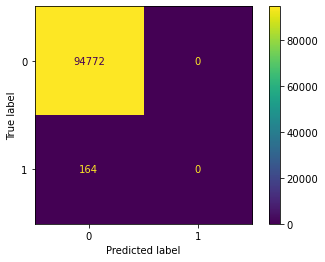

In [23]:
# Confusion Matrix Graph
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
